# Escape Summer School - Classification, Performance Evaluation & Hyper-parameter Optimization

# SOLUTIONS

### Classification

- The task for which the `digits` dataset was originally devised is, of course, identifying which handwritten digit is in each image.
- This is a useful task in the real world, where machines read postcodes on letters to sort them, and digits on cheques to validate them automatically.
- We have labels in the training dataset, therefore this is a **supervised classification** task. Supervised classification is the most common of modern ML tasks.

### Support Vector Classifiers

- Today, large-scale, high-dimensional classification tasks on complex data are almost always solved with deep neural networks.
- However, simpler algorithms are still used for smaller and lower-dimensional datasets. One of these is called the Support Vector Classifier.

Before we proceed, it's time to introduce the split between training set and test set.
- Having a separate test set, composed of data kept out of the training, is important in order to check whether our model is able to *generalise properly* on data it has not seen before.

In [1]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Load the dataset and plot some images along with their labels

Number of digits : 1797


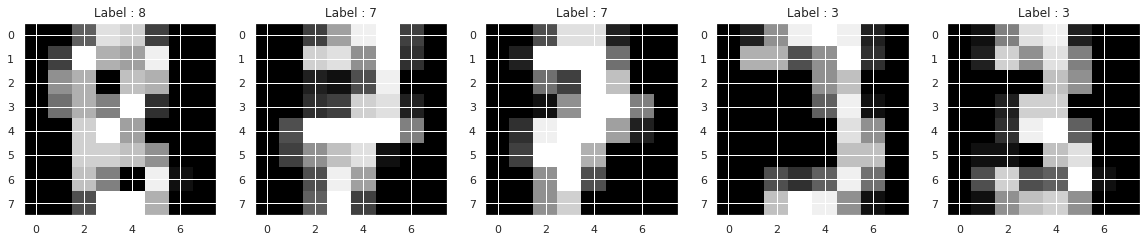

In [2]:
from sklearn.datasets import load_digits

np.random.seed(0)
digits = load_digits()

images = digits['images'] # The real digit images of size (N, 8, 8)
X = digits['data'] # The vectorised data of size (N, 64)
y = digits['target']
N = len(images)
print('Number of digits :', N)

plt.figure(figsize=(20, 4))
for i, r in enumerate(randint(0, N, 5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[r], cmap="gray")
    plt.title('Label : ' + str(y[r]))

## Classification without cross-validation

### Split in train and test datasets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape :', X_train.shape)
print('Test set shape     :', X_test.shape)

Training set shape : (1437, 64)
Test set shape     : (360, 64)


### Train classifier

In [4]:
from sklearn.svm import SVC

kernel = 'rbf'
gamma = 0.01
svc = SVC(kernel=kernel, gamma=gamma)

# training
svc.fit(X_train, y_train)

# looking at prediction on test set
y_pred = svc.predict(X_test)

# accuracy of the model
accuracy = sum(y_pred == y_test) / len(y_pred)
print("%0.5f accuracy" % (accuracy))

0.79167 accuracy


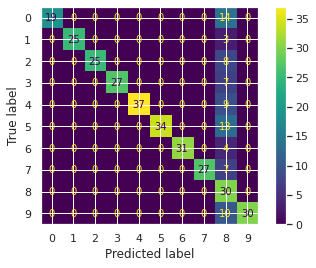

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Classification with Cross-validation

In [6]:
from sklearn.model_selection import cross_validate

scores = cross_validate(svc, X_train, y_train, cv=10, return_estimator=True)

print("%0.5f accuracy with a standard deviation of %0.5f" % (scores['test_score'].mean(), scores['test_score'].std()))

0.76341 accuracy with a standard deviation of 0.02024


In [7]:
scores_test = []
for estimator in scores['estimator']:
    y_pred = estimator.predict(X_test)
    accuracy = sum(y_pred == y_test) / len(y_pred)
    scores_test.append(accuracy)
    
print("%0.5f accuracy with a standard deviation of %0.5f" % (np.mean(scores_test), np.std(scores_test)))

0.77472 accuracy with a standard deviation of 0.00966


## Hyperparameter optimization

In [8]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.1, 0.01, 0.001, 0.0001]

param_grid = [
    {"kernel": ["rbf"], "gamma": gamma, "C": C},
    {"kernel": ["linear"], "C": C},
]

grid_search = GridSearchCV(cv=5, estimator=svc, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print("Best parameters set :", grid_search.best_params_)

Best parameters set : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [9]:
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, grid_search.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

0.107 (+/-0.003) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.955 (+/-0.018) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.863 (+/-0.055) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.745 (+/-0.015) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.987 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.019) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.003) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.761 (+/-0.020) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.990 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.014) for {'C': 10, 'gamma': 0

## ROC curves

The objective is to compute the ROC curves of a classifier trained to distinguish between even and odd numbers for different combinaisons of data dimensionnality reduction (using PCA).

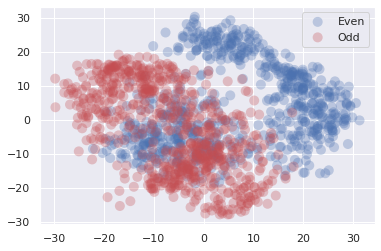

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

y_train = y_train % 2 == 0 # Even or odd
y_test = y_test % 2 == 0 # Even or odd

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

plt.scatter(
    X_train_pca[y_train==True, 0], 
    X_train_pca[y_train==True, 1], 
    c='b', 
    s=100,
    label='Even',
    alpha=0.3, 
    edgecolors='none'
)

plt.scatter(
    X_train_pca[y_train==False, 0], 
    X_train_pca[y_train==False, 1], 
    c='r', 
    s=100,
    label='Odd',
    alpha=0.3, 
    edgecolors='none'
)

plt.legend()

0.72500 accuracy for 1 PC(s)
0.86111 accuracy for 2 PC(s)
0.87778 accuracy for 3 PC(s)
0.92500 accuracy for 4 PC(s)
0.96944 accuracy for 5 PC(s)
0.97778 accuracy for 6 PC(s)
0.98056 accuracy for 7 PC(s)
0.97778 accuracy for 8 PC(s)
0.98333 accuracy for 9 PC(s)


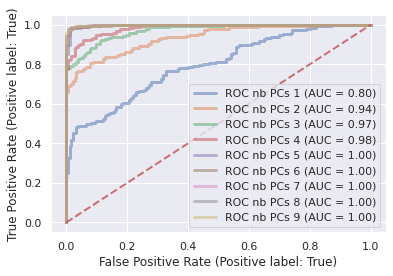

In [11]:
from sklearn.metrics import RocCurveDisplay

svc = SVC(kernel='rbf', gamma=0.001, C=10) # Best classifier according to grid search

fig, ax = plt.subplots()
for n in range(1, 10):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    svc.fit(X_train_pca, y_train)
    
    y_pred = svc.predict(X_test_pca)
    
    # accuracy of the model
    accuracy = sum(y_pred == y_test) / len(y_pred)
    print("%0.5f accuracy for %d PC(s)" % (accuracy, n))
    
    viz = RocCurveDisplay.from_estimator(
        svc,
        X_test_pca,
        y_test,
        name="ROC nb PCs {}".format(n),
        alpha=0.5,
        lw=3,
        ax=ax,
    )

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)